In [6]:
from matplotlib import pyplot as plt
import numpy as np

path = 'C:/Users/Przemek/Downloads/Discord UE.csv/Discord UE.csv'

In [7]:
def prepare_responses(path):
    with open(path, 'r', encoding='utf8') as raw:
        questions = [q.strip('/"\n') for q in raw.readline().split(sep=',')]
        print(questions)

        # print(len(questions))

        responses = []

        for line in raw:

            response = dict()
            stack = ''
            appending = False
            i = 0
            for char in line:
                if not appending and char == '\"':
                    appending = True
                elif not stack and char == ',':
                    continue
                elif appending and char == '\"':
                    if ',' in stack or ';' in stack:
                        nums = [int(n.strip()) if n.strip() != 'inf' else 'inf' for n in stack.replace(',', ';').split(';')]
                        response[i] = {'clicks': nums[0], 'time': nums[1], 'hardness': nums[2]}
                    else:
                        response[i] = stack.strip('/"')

                    stack = ''
                    appending = False
                    i += 1
                else:
                    stack += char

            responses.append(response)

        print()
        for response in responses:
            print(list(response.values()))

    return questions, responses


def create_bar_chart(groups, values, title):

    height = [sum([1 for v in values if v in groups['content'][i]]) for i in range(len(groups))]
    bars = groups['names']
    y_pos = np.arange(len(bars))

    # Create bars
    plt.bar(y_pos, height)

    # Create names on the x-axis
    plt.xticks(y_pos, bars)

    plt.title(title)

    # Show graphic
    plt.show()

In [8]:
questions, responses = prepare_responses(path)

['Timestamp', 'Twój pseudonim', 'Podaj swój wiek', 'Podaj swoją płeć', 'Ile godzin dziennie spędzasz korzystając z komputera?', 'Jak określiłbyś swoje doświadczenie z Discordem?', 'Dodaj nowego znajomego o nicku tmek1244#3009', 'Utwórz serwer o nazwie “Śmieszne Całeczki”', 'Napisz prywatną wiadomość do znajomego', 'Rozpocznij udostępnianie ekranu na kanale ogólnym', 'Dodaj znajomego na serwer', 'Wyślij wiadomość na kanale ogólnym “Cześć', ' jestem nowy”', 'Utwórz kanał tekstowy ""weekendowe pogaduchy', 'Utwórz kanał głosowy “tygodniowe pogaduchy”', 'Dodaj rolę ""Administrator"" na serwerze', 'Wyłącz możliwość pisania wiadomości dla roli @everyone', 'Stwórz nową kategorię na serwerze', 'Ogarnicz limit osób na kanale głosowym do 4', 'Wyślij gifa na czat', 'Wycisz serwer', 'Sprawdź kto dodał kanał ""weekendowe pogaduchy', 'Odpowiedz na wiadomość na kanale ogólnym', 'Zareaguj na wiadomość na kanale ogólnym', 'Usuń kanał ""weekendowe pogaduchy', 'Przypnij wiadomość na kanale ogólnym', 'Znaj

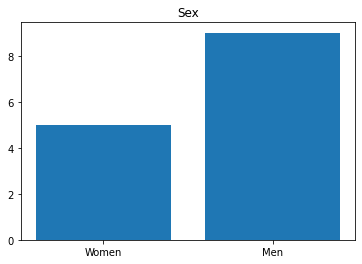

In [9]:
groups = {'names': ['Women', 'Men'], 'content': ['Kobieta', 'Mężczyzna']}
create_bar_chart(groups, [r[3] for r in responses], 'Sex')


# groups = {'names': ['Women', 'Men'], 'content': ['Kobieta', 'Mężczyzna']}